In [1]:
!pip install prettytable

In [2]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [25]:
# Function to maximise
def fitness_function(x):
    return x**2 + x**3

def binary_to_decimal(binary):
    return int(binary, 2)

def decimal_to_binary(decimal, bits):
    return format(decimal, f'0{bits}b')

def roulette_wheel_selection(population, fitnesses):
    total_fitness = sum(fitnesses)
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, fitness in enumerate(fitnesses):
        current += fitness
        if current > pick:
            return population[i]

def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(individual):
    index_to_mutate = random.randint(0, len(individual) - 1)
    new_individual = list(individual)
    new_individual[index_to_mutate] = str(1 - int(new_individual[index_to_mutate]))
    return ''.join(new_individual)

def create_initial_population(population_size, bits):
    return [''.join(random.choice('01') for _ in range(bits)) for _ in range(population_size)]

def genetic_algorithm(population_size, bits, generations):
    population = create_initial_population(population_size, bits)

    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    best_performers = []
    all_populations = []

    table = PrettyTable()

    table.field_names = ["Generation", "Population", "Best Individual", "Fitness"]

    for generation in range(generations):
        fitnesses = [fitness_function(binary_to_decimal(ind)) for ind in population]

        best_individual = max(population, key=lambda ind: fitness_function(binary_to_decimal(ind)))
        best_fitness = fitness_function(binary_to_decimal(best_individual))
        best_performers.append((best_individual, best_fitness))
        all_populations.append(population[:])

        population_str = ", ".join([str(binary_to_decimal(ind)) for ind in population])
        table.add_row([generation + 1, population_str, binary_to_decimal(best_individual), best_fitness])

        new_population = []
        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, fitnesses)
            parent2 = roulette_wheel_selection(population, fitnesses)
            child1, child2 = single_point_crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    print(table)
    world = [i for pop_i in all_populations for i in pop_i]
    # Plot the population of the last generation
    final_population = [binary_to_decimal(ind) for ind in all_populations[-1]]
    final_fitnesses = [fitness_function(ind) for ind in final_population]

    best_solution = max(world, key=lambda ind: fitness_function(binary_to_decimal(ind)))
    print(f"Best solution found: x = {binary_to_decimal(best_solution)}")
    print(f"Fitness of best solution: {fitness_function(binary_to_decimal(best_solution))}")

    axs[0].scatter(range(len(final_population)), final_population, color='blue')
    axs[0].scatter([final_population.index(max(final_population))], [max(final_population)], color='red', s=100)
    axs[0].set_ylabel('Individual Value')
    axs[0].set_title(f'Final Generation ({generations}) Population')

    # Plot the best fitness over generations
    generations_list = range(1, len(best_performers) + 1)
    best_fitness_values = [fit for _, fit in best_performers]

    axs[1].plot(generations_list, best_fitness_values, color='green')
    axs[1].set_xlabel('Generation')
    axs[1].set_ylabel('Best Fitness')
    axs[1].set_title('Best Fitness Over Generations')

    x_range = np.linspace(0, 31, 100)
    y_values = [fitness_function(x) for x in x_range]

    axs[2].plot(x_range, y_values, color='purple')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('f(x)')
    axs[2].set_title('Function f(x) = x^2 + x^3')

    plt.tight_layout()
    plt.show()

+------------+--------------------------------+-----------------+---------+
| Generation |           Population           | Best Individual | Fitness |
+------------+--------------------------------+-----------------+---------+
|     1      |   6, 29, 5, 25, 2, 12, 10, 8   |        29       |  25230  |
|     2      | 13, 13, 17, 31, 13, 31, 13, 25 |        31       |  30752  |
|     3      |  23, 15, 15, 29, 7, 13, 28, 3  |        29       |  25230  |
|     4      | 21, 20, 27, 22, 28, 12, 9, 23  |        28       |  22736  |
|     5      | 12, 30, 31, 5, 27, 20, 22, 30  |        31       |  30752  |
|     6      | 28, 31, 11, 28, 28, 19, 26, 31 |        31       |  30752  |
|     7      | 24, 27, 30, 24, 23, 30, 10, 29 |        30       |  27900  |
|     8      | 26, 26, 8, 28, 26, 22, 26, 26  |        28       |  22736  |
|     9      | 10, 24, 27, 18, 24, 29, 18, 30 |        30       |  27900  |
|     10     | 24, 12, 14, 22, 25, 28, 16, 19 |        28       |  22736  |
+-----------

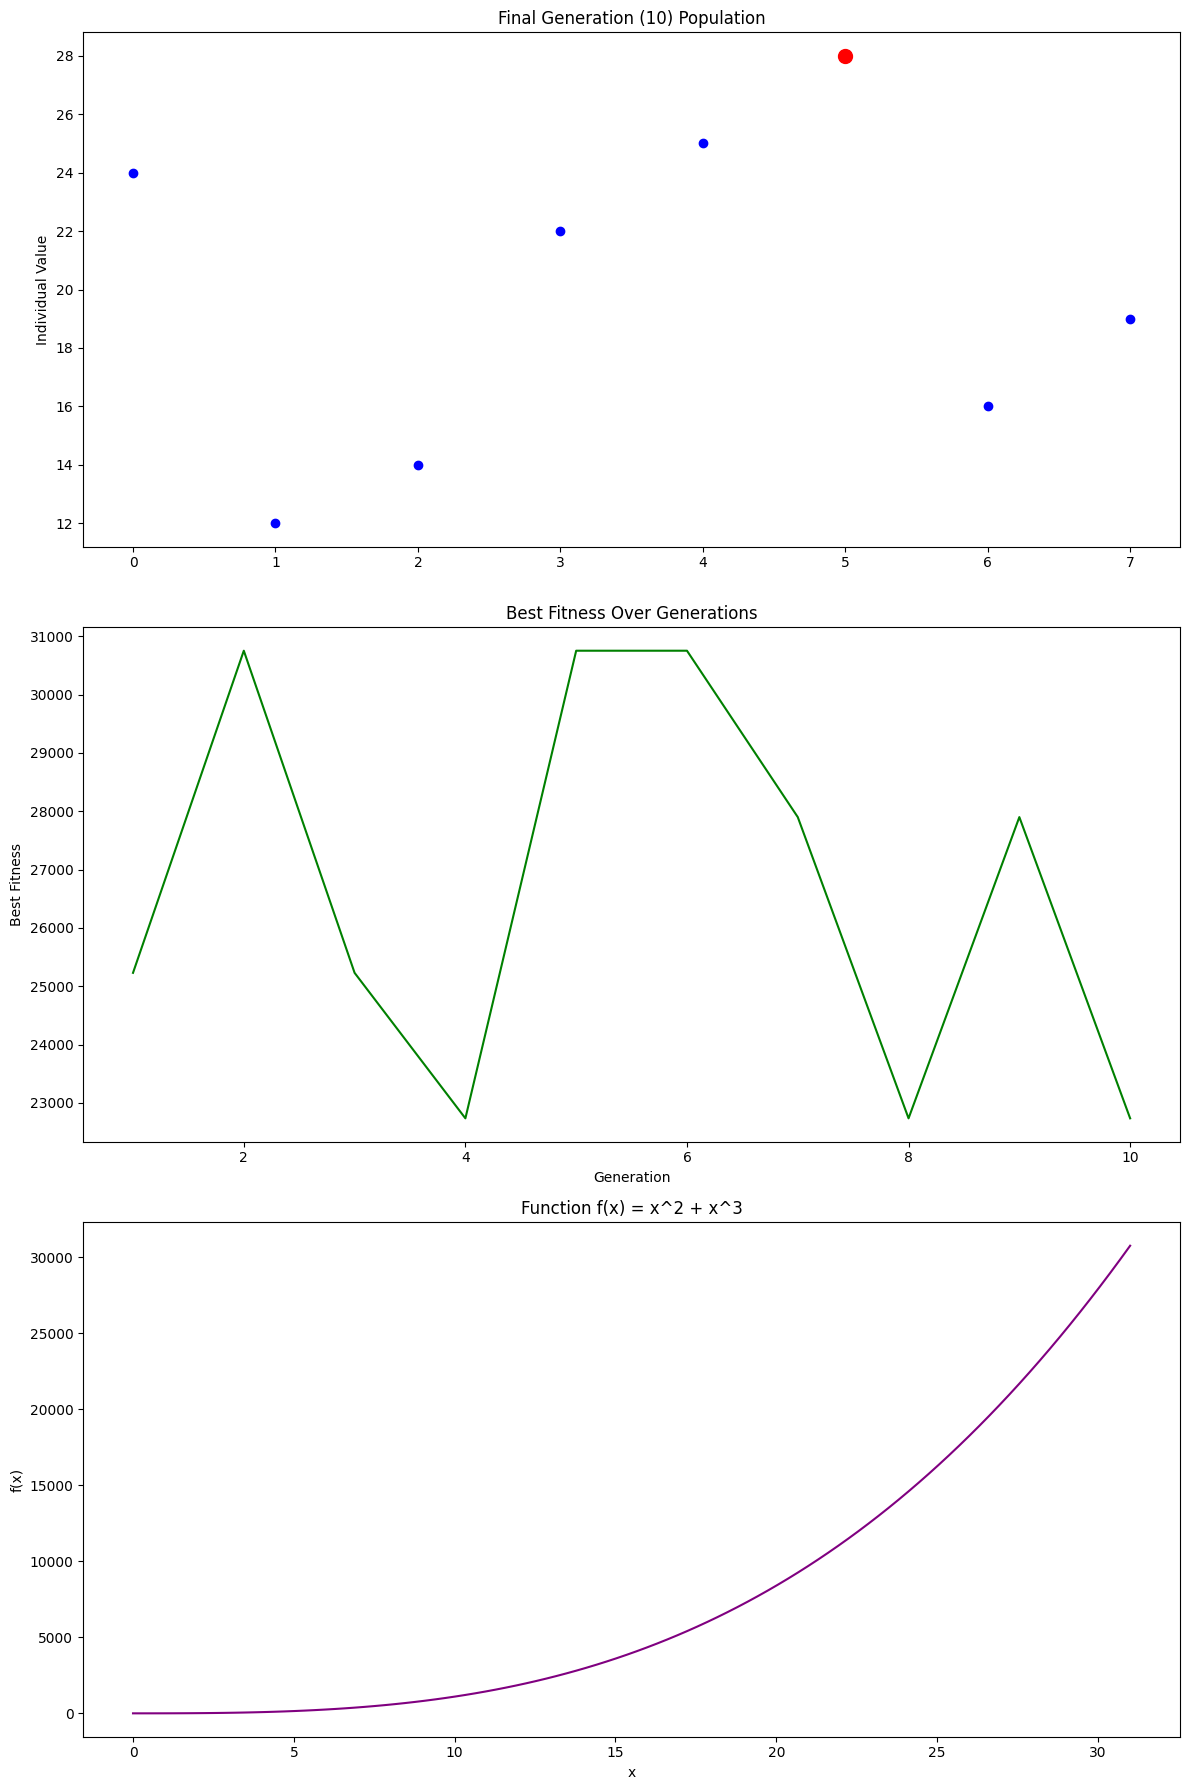

In [26]:
# Parameters for the genetic algorithm
population_size = 8
bits = 5
generations = 10

genetic_algorithm(population_size, bits, generations)

In [ ]:
def genetic_algorithm():
    func = input("Enter function (use x as variable): ")
    range_min = int(input("Minimum value: "))
    range_max = int(input("Maximum value: "))
    binary_size = int(input("Binary string length: "))
    maximize = input("Maximize? (y/n): ").lower() == 'y'
    generations = int(input("Number of generations: "))
    crossover_type = input("Crossover type (single/two): ")
    mutation_bits = int(input("Mutation bits: "))

    def fitness_function(x):
        return eval(func)
    
    def binary_to_decimal(binary):
        return int(binary, 2)

    def decimal_to_binary(decimal, bits):
        return format(decimal, f'0{bits}b')

    def roulette_wheel_selection(population, fitnesses):
        total_fitness = sum(fitnesses)
        pick = random.uniform(0, total_fitness)
        current = 0
        for i, fitness in enumerate(fitnesses):
            current += fitness
            if current > pick:
                return population[i]

    def crossover(parent1, parent2):
        if crossover_type == 'single':
            point = random.randint(1, len(parent1) - 1)
            child1 = parent1[:point] + parent2[point:]
            child2 = parent2[:point] + parent1[point:]
        else:  
            point1, point2 = sorted(random.sample(range(1, len(parent1)), 2))
            child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
            child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
        return child1, child2

    def mutate(individual):
        for _ in range(mutation_bits):
          index_to_mutate = random.randint(0, len(individual) - 1)
          new_individual = list(individual)
          new_individual[index_to_mutate] = str(1 - int(new_individual[index_to_mutate]))
        return ''.join(new_individual)

    population = [''.join(random.choice('01') for _ in range(binary_size)) for _ in range(8)]

    all_populations = []
    for generation in range(generations):

        fitnesses = [fitness_function(binary_to_decimal(ind)) for ind in population]
        if not maximize:
            fitnesses = [-f for f in fitnesses]

        best_ind = max(zip(population, fitnesses), key=lambda x: x[1])
        print(f"Generation {generation + 1}: Best solution = {binary_to_decimal(best_ind[0])}, Fitness = {abs(best_ind[1])}")
        all_populations.append(population[:])

        new_population = []
        for _ in range(4):
            parent1 = roulette_wheel_selection(population, fitnesses)
            parent2 = roulette_wheel_selection(population, fitnesses)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1), mutate(child2)])

        population = new_population

    fitnesses = [fitness_function(binary_to_decimal(ind)) for pop_i in all_populations for ind in pop_i]
    world = [i for pop_i in all_populations for i in pop_i]
    if not maximize:
        fitnesses = [-f for f in fitnesses]
    best_ind = max(zip(world, fitnesses), key=lambda x: x[1])
    print(f"\nBest solution found: x = {binary_to_decimal(best_ind[0])}")
    print(f"Fitness of best solution: {abs(best_ind[1])}")

In [ ]:
genetic_algorithm()

Enter function (use x as variable): x
Minimum value: 0
Maximum value: 31
Binary string length: 5
Maximize? (y/n): y
Number of generations: 10
Crossover type (single/two): single
Mutation bits: 1
Generation 1: Best solution = 31, Fitness = 31
Generation 2: Best solution = 30, Fitness = 30
Generation 3: Best solution = 31, Fitness = 31
Generation 4: Best solution = 29, Fitness = 29
Generation 5: Best solution = 31, Fitness = 31
Generation 6: Best solution = 30, Fitness = 30
Generation 7: Best solution = 31, Fitness = 31
Generation 8: Best solution = 31, Fitness = 31
Generation 9: Best solution = 25, Fitness = 25
Generation 10: Best solution = 31, Fitness = 31

Best solution found: x = 31
Fitness of best solution: 31
